In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\l\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\l\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes)

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.5793 - acc: 0.7451 - val_loss: 0.3760 - val_acc: 0.8737
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3084 - acc: 0.9034 - val_loss: 0.2935 - val_acc: 0.8893
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2216 - acc: 0.9258 - val_loss: 0.2799 - val_acc: 0.8892
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1723 - acc: 0.9417 - val_loss: 0.3098 - val_acc: 0.8764
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1463 - acc: 0.9517 - val_loss: 0.3137 - val_acc: 0.8788
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1245 - acc: 0.9602 - val_loss: 0.3243 - val_acc: 0.8779
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1105 - acc: 0.9644 - val_loss: 0.3812 - val_acc: 0.8677
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0928 - a

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 28ms/step - loss: 0.6410 - acc: 0.6183 - val_loss: 0.5536 - val_acc: 0.7343
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.5217 - acc: 0.8039 - val_loss: 0.4976 - val_acc: 0.8214
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4607 - acc: 0.8687 - val_loss: 0.4689 - val_acc: 0.8520
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4210 - acc: 0.9039 - val_loss: 0.4526 - val_acc: 0.8638
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3946 - acc: 0.9236 - val_loss: 0.4482 - val_acc: 0.8626
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3716 - acc: 0.9396 - val_loss: 0.4372 - val_acc: 0.8736
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3502 - acc: 0.9472 - val_loss: 0.4309 - val_acc: 0.8777
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3353 - a

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

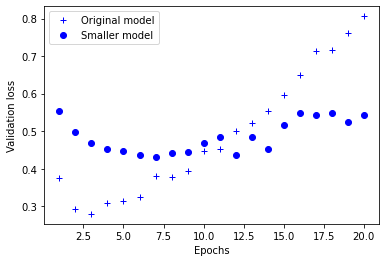

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 8s 155ms/step - loss: 0.5956 - acc: 0.7059 - val_loss: 0.2775 - val_acc: 0.8896
Epoch 2/20
49/49 [==============================] - 7s 143ms/step - loss: 0.2493 - acc: 0.9050 - val_loss: 0.2705 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 7s 142ms/step - loss: 0.1301 - acc: 0.9521 - val_loss: 0.4800 - val_acc: 0.8254
Epoch 4/20
49/49 [==============================] - 7s 143ms/step - loss: 0.0639 - acc: 0.9793 - val_loss: 0.3869 - val_acc: 0.8813
Epoch 5/20
49/49 [==============================] - 7s 144ms/step - loss: 0.0288 - acc: 0.9945 - val_loss: 0.4179 - val_acc: 0.8811
Epoch 6/20
49/49 [==============================] - 7s 146ms/step - loss: 0.0030 - acc: 0.9999 - val_loss: 0.6525 - val_acc: 0.8795
Epoch 7/20
49/49 [==============================] - 7s 145ms/step - loss: 0.0305 - acc: 0.9973 - val_loss: 0.5493 - val_acc: 0.8750
Epoch 8/20
49/49 [==============================] - 7s 142ms/step - loss: 0.

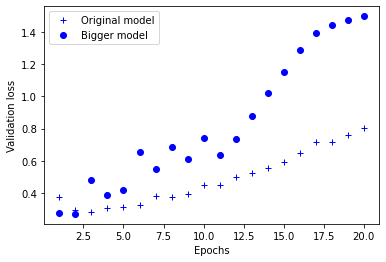

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

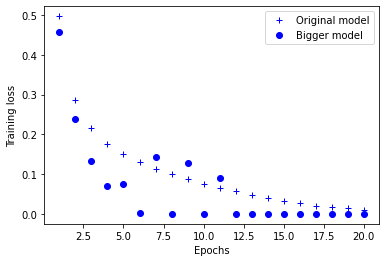

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.6060 - acc: 0.7355 - val_loss: 0.3883 - val_acc: 0.8822
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3350 - acc: 0.9020 - val_loss: 0.3469 - val_acc: 0.8823
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2785 - acc: 0.9190 - val_loss: 0.3356 - val_acc: 0.8856
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2521 - acc: 0.9298 - val_loss: 0.3381 - val_acc: 0.8836
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2308 - acc: 0.9389 - val_loss: 0.3376 - val_acc: 0.8857
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2250 - acc: 0.9429 - val_loss: 0.3628 - val_acc: 0.8760
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2157 - acc: 0.9448 - val_loss: 0.3580 - val_acc: 0.8792
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2106 - a

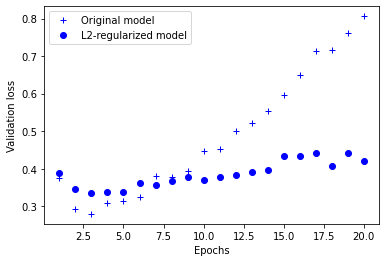

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [18]:
# At training time: we drop out 50% of the units in the output
layer_output = np.array([0.2, 0.5, 1.3, 0.8, 1.1])

layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
print(layer_output)

[0.2 0.  1.3 0.8 1.1]


In [19]:
# At test time:
layer_output *= 0.5

In [20]:
# At training time:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5
layer_output

array([0.2, 0. , 1.3, 0. , 1.1])

In [21]:
# model.add(layers.Dropout(0.5))

In [22]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [23]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 33ms/step - loss: 0.6524 - acc: 0.5982 - val_loss: 0.4613 - val_acc: 0.8631
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4890 - acc: 0.7780 - val_loss: 0.3544 - val_acc: 0.8814
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3834 - acc: 0.8442 - val_loss: 0.3007 - val_acc: 0.8854
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3265 - acc: 0.8788 - val_loss: 0.2776 - val_acc: 0.8888
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2823 - acc: 0.9030 - val_loss: 0.2879 - val_acc: 0.8795
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2428 - acc: 0.9181 - val_loss: 0.2841 - val_acc: 0.8894
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2155 - acc: 0.9259 - val_loss: 0.2950 - val_acc: 0.8872
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2016 - a

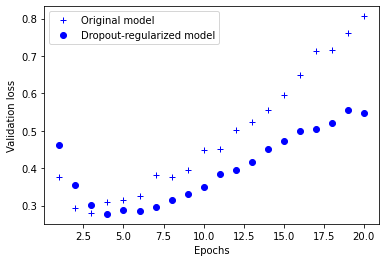

In [24]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()